In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
pd.set_option("display.max_columns", None)

In [3]:
np.random.seed(42)
n = 50000

In [4]:
df = pd.DataFrame({
    "customer_id": range(1, n + 1),
    "age": np.random.randint(18, 70, n),
    "gender": np.random.choice(["Male", "Female"], n),
    "tenure_months": np.random.randint(1, 72, n),
    "monthly_charges": np.random.randint(300, 5000, n),
    "contract_type": np.random.choice(
        ["Month-to-Month", "One Year", "Two Year"],
        n,
        p=[0.6, 0.25, 0.15]
    ),
    "payment_method": np.random.choice(
        ["UPI", "Credit Card", "Debit Card", "Net Banking"],
        n
    ),
    "internet_service": np.random.choice(["Yes", "No"], n, p=[0.8, 0.2]),
    "support_calls": np.random.poisson(3, n)
})

In [5]:
df["churn"] = np.where(
    (df["contract_type"] == "Month-to-Month") &
    (df["support_calls"] > 4) &
    (df["tenure_months"] < 12),
    "Yes",
    "No"
)

In [6]:
df["total_charges"] = df["monthly_charges"] * df["tenure_months"]

In [7]:
df.shape

(50000, 11)

In [8]:
df.head(10)

,customer_id,age,gender,tenure_months,monthly_charges,contract_type,payment_method,internet_service,support_calls,churn,total_charges
0,1,56,Male,62,310,One Year,Net Banking,No,2,No,19220
1,2,69,Male,58,1331,Month-to-Month,Debit Card,No,0,No,77198
2,3,46,Male,34,3088,Month-to-Month,Debit Card,Yes,5,No,104992
3,4,32,Male,57,3700,Month-to-Month,Net Banking,Yes,2,No,210900
4,5,60,Male,29,1908,Month-to-Month,UPI,Yes,6,No,55332
5,6,25,Male,52,2477,Month-to-Month,Credit Card,Yes,2,No,128804
6,7,38,Male,8,1384,Month-to-Month,Debit Card,No,1,No,11072
7,8,56,Male,16,2812,Month-to-Month,Net Banking,Yes,0,No,44992
8,9,36,Male,30,3629,Month-to-Month,Credit Card,Yes,4,No,108870
9,10,40,Female,26,1829,Month-to-Month,Debit Card,Yes,2,No,47554


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customer_id       50000 non-null  int64 
 1   age               50000 non-null  int32 
 2   gender            50000 non-null  object
 3   tenure_months     50000 non-null  int32 
 4   monthly_charges   50000 non-null  int32 
 5   contract_type     50000 non-null  object
 6   payment_method    50000 non-null  object
 7   internet_service  50000 non-null  object
 8   support_calls     50000 non-null  int32 
 9   churn             50000 non-null  object
 10  total_charges     50000 non-null  int32 
dtypes: int32(5), int64(1), object(5)
memory usage: 3.2+ MB


In [10]:
df.describe()

,customer_id,age,tenure_months,monthly_charges,support_calls,total_charges
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000
mean,25000.500000,43.508260,35.86742,2644.218140,2.992620,94889.480080
std,14433.901067,14.987668,20.48617,1352.850849,1.728822,77679.979234
min,1.000000,18.000000,1.00000,300.000000,0.000000,302.000000
25%,12500.750000,31.000000,18.00000,1472.000000,2.000000,31134.250000
50%,25000.500000,43.000000,36.00000,2639.500000,3.000000,73787.500000
75%,37500.250000,56.000000,54.00000,3812.000000,4.000000,142132.500000
max,50000.000000,69.000000,71.00000,4999.000000,13.000000,354716.000000


In [11]:
df.isnull().sum()

customer_id         0
age                 0
gender              0
tenure_months       0
monthly_charges     0
contract_type       0
payment_method      0
internet_service    0
support_calls       0
churn               0
total_charges       0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df["churn"].value_counts()

churn
No     49161
Yes      839
Name: count, dtype: int64

In [14]:
df["churn"].value_counts(normalize=True) * 100

churn
No     98.322
Yes     1.678
Name: proportion, dtype: float64

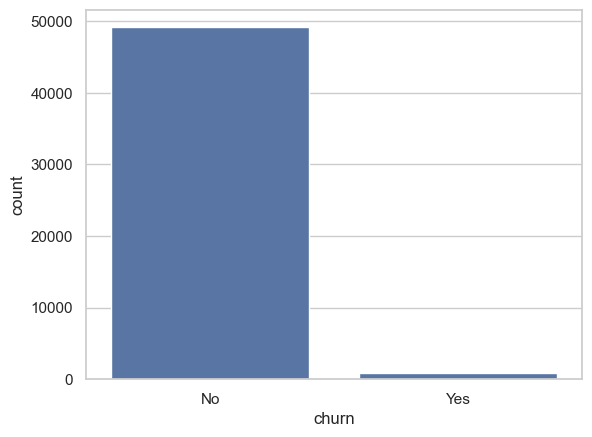

In [15]:
sns.countplot(x="churn", data=df)
plt.show()

In [16]:
df["gender"].value_counts()

gender
Female    25162
Male      24838
Name: count, dtype: int64

In [17]:
pd.crosstab(df["gender"], df["churn"], normalize="index")

churn,No,Yes
gender,,
Female,0.984500,0.015500
Male,0.981923,0.018077


In [18]:
df["contract_type"].value_counts()

contract_type
Month-to-Month    29745
One Year          12684
Two Year           7571
Name: count, dtype: int64

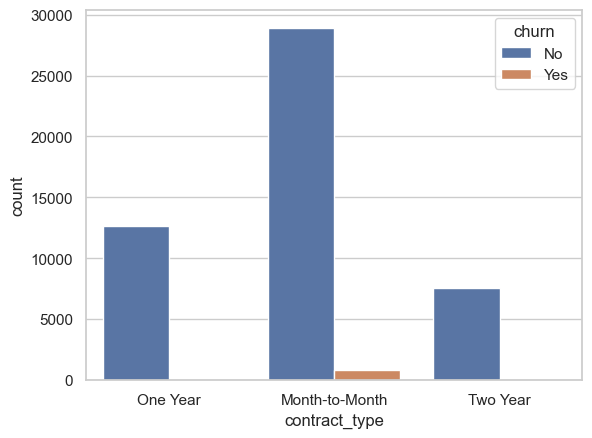

In [19]:
sns.countplot(x="contract_type", hue="churn", data=df)
plt.show()

In [20]:
df.groupby("contract_type")["churn"].value_counts(normalize=True)

contract_type   churn
Month-to-Month  No       0.971794
                Yes      0.028206
One Year        No       1.000000
Two Year        No       1.000000
Name: proportion, dtype: float64

In [21]:
df["payment_method"].value_counts()

payment_method
Net Banking    12572
Debit Card     12548
UPI            12461
Credit Card    12419
Name: count, dtype: int64

In [22]:
df.groupby("payment_method")["churn"].value_counts(normalize=True)

payment_method  churn
Credit Card     No       0.982688
                Yes      0.017312
Debit Card      No       0.983982
                Yes      0.016018
Net Banking     No       0.983694
                Yes      0.016306
UPI             No       0.982505
                Yes      0.017495
Name: proportion, dtype: float64

In [23]:
df["internet_service"].value_counts()

internet_service
Yes    39906
No     10094
Name: count, dtype: int64

In [24]:
df.groupby("internet_service")["churn"].value_counts(normalize=True)

internet_service  churn
No                No       0.983555
                  Yes      0.016445
Yes               No       0.983135
                  Yes      0.016865
Name: proportion, dtype: float64

In [25]:
df["support_calls"].describe()

count    50000.000000
mean         2.992620
std          1.728822
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         13.000000
Name: support_calls, dtype: float64

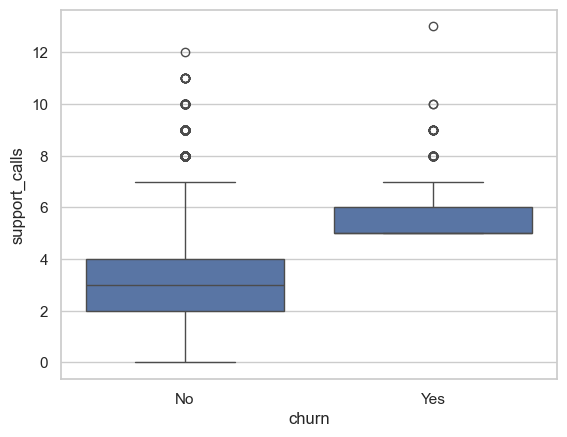

In [26]:
sns.boxplot(x="churn", y="support_calls", data=df)
plt.show()

In [27]:
df.groupby("churn")["support_calls"].mean()

churn
No     2.946401
Yes    5.700834
Name: support_calls, dtype: float64

In [28]:
df["tenure_months"].describe()

count    50000.00000
mean        35.86742
std         20.48617
min          1.00000
25%         18.00000
50%         36.00000
75%         54.00000
max         71.00000
Name: tenure_months, dtype: float64

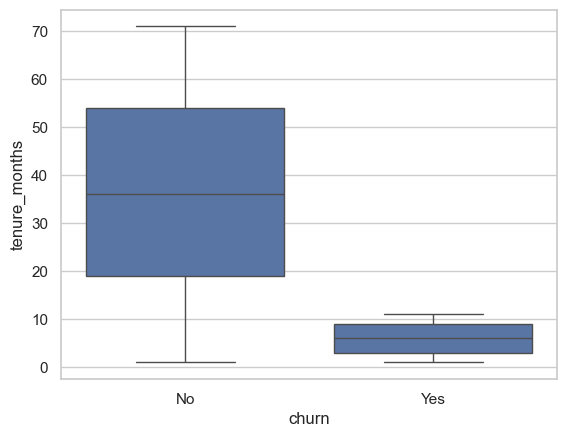

In [29]:
sns.boxplot(x="churn", y="tenure_months", data=df)
plt.show()

In [30]:
df.groupby("churn")["tenure_months"].mean()

churn
No     36.378715
Yes     5.908224
Name: tenure_months, dtype: float64

In [31]:
df["monthly_charges"].describe()

count    50000.000000
mean      2644.218140
std       1352.850849
min        300.000000
25%       1472.000000
50%       2639.500000
75%       3812.000000
max       4999.000000
Name: monthly_charges, dtype: float64

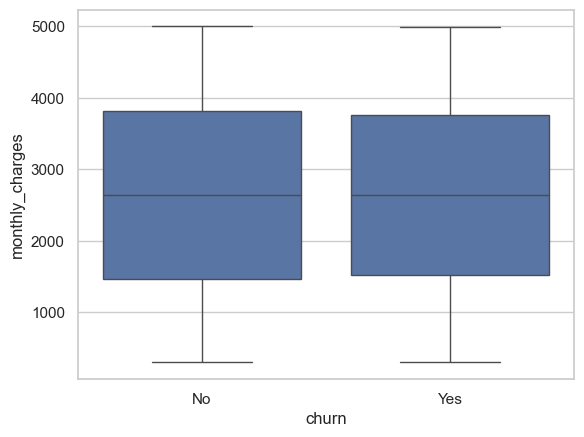

In [32]:
sns.boxplot(x="churn", y="monthly_charges", data=df)
plt.show()

In [33]:
df.groupby("churn")["monthly_charges"].mean()

churn
No     2644.193446
Yes    2645.665077
Name: monthly_charges, dtype: float64

In [34]:
df["tenure_group"] = pd.cut(
    df["tenure_months"],
    bins=[0,12,24,48,72],
    labels=["0-1 Year","1-2 Years","2-4 Years","4+ Years"]
)

In [35]:
df["tenure_group"].value_counts()

tenure_group
2-4 Years    16998
4+ Years     16027
0-1 Year      8564
1-2 Years     8411
Name: count, dtype: int64

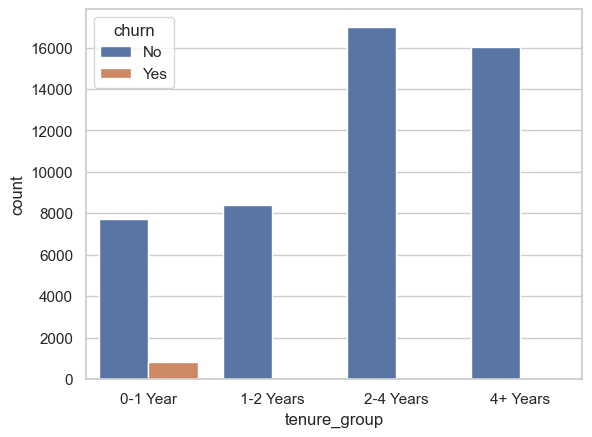

In [36]:
sns.countplot(x="tenure_group", hue="churn", data=df)
plt.show()

In [37]:
df.groupby("tenure_group")["churn"].value_counts(normalize=True)

C:\Users\Ajay\AppData\Local\Temp\ipykernel_25432\1149642441.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("tenure_group")["churn"].value_counts(normalize=True)


tenure_group  churn
0-1 Year      No       0.902032
              Yes      0.097968
1-2 Years     No       1.000000
              Yes      0.000000
2-4 Years     No       1.000000
              Yes      0.000000
4+ Years      No       1.000000
              Yes      0.000000
Name: proportion, dtype: float64

In [38]:
df_encoded = pd.get_dummies(df.drop(columns=["customer_id"]), drop_first=True)

In [39]:
corr = df_encoded.corr()

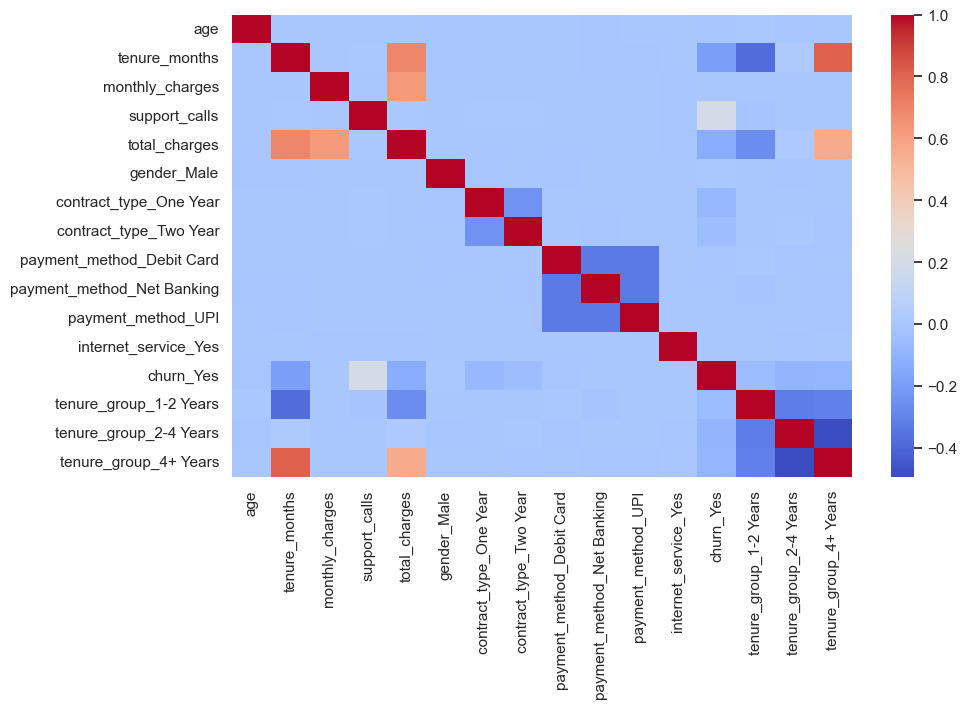

In [40]:
plt.figure(figsize=(10,6))
sns.heatmap(corr, cmap="coolwarm")
plt.show()

In [41]:
corr["churn_Yes"].sort_values(ascending=False)

churn_Yes                     1.000000
support_calls                 0.204648
gender_Male                   0.010033
payment_method_UPI            0.003205
internet_service_Yes          0.001310
monthly_charges               0.000140
payment_method_Net Banking   -0.002138
payment_method_Debit Card    -0.003432
age                          -0.003963
contract_type_Two Year       -0.055184
tenure_group_1-2 Years       -0.058750
contract_type_One Year       -0.076164
tenure_group_4+ Years        -0.089728
tenure_group_2-4 Years       -0.093756
total_charges                -0.132954
tenure_months                -0.191049
Name: churn_Yes, dtype: float64

In [42]:
high_risk = df[
    (df["contract_type"] == "Month-to-Month") &
    (df["tenure_months"] < 12) &
    (df["support_calls"] > 4)
]

In [43]:
len(high_risk)

839

In [44]:
high_risk["contract_type"].value_counts()

contract_type
Month-to-Month    839
Name: count, dtype: int64

In [45]:
high_risk["tenure_months"].describe()

count    839.000000
mean       5.908224
std        3.180702
min        1.000000
25%        3.000000
50%        6.000000
75%        9.000000
max       11.000000
Name: tenure_months, dtype: float64

In [46]:
df.groupby("contract_type")["monthly_charges"].mean()

contract_type
Month-to-Month    2646.978484
One Year          2637.553138
Two Year          2644.539427
Name: monthly_charges, dtype: float64

In [47]:
df.groupby("payment_method")["monthly_charges"].mean()

payment_method
Credit Card    2648.098237
Debit Card     2646.878785
Net Banking    2644.550748
UPI            2637.336329
Name: monthly_charges, dtype: float64

In [48]:
df.groupby("internet_service")["monthly_charges"].mean()

internet_service
No     2666.114028
Yes    2638.679697
Name: monthly_charges, dtype: float64

In [49]:
df.groupby("contract_type")["support_calls"].mean()

contract_type
Month-to-Month    2.971256
One Year          3.018133
Two Year          3.033813
Name: support_calls, dtype: float64

In [50]:
pd.pivot_table(
    df,
    values="customer_id",
    index="contract_type",
    columns="churn",
    aggfunc="count"
)

churn,No,Yes
contract_type,,
Month-to-Month,28906.0,839.0
One Year,12684.0,NaN
Two Year,7571.0,NaN


In [53]:
pivot_counts = pd.pivot_table(
    df,
    values="customer_id",
    index="contract_type",
    columns="churn",
    aggfunc="count"
)

pivot_counts


churn,No,Yes
contract_type,,
Month-to-Month,28906.0,839.0
One Year,12684.0,NaN
Two Year,7571.0,NaN


In [54]:
pivot_percent = pivot_counts.div(pivot_counts.sum(axis=1), axis=0) * 100
pivot_percent

churn,No,Yes
contract_type,,
Month-to-Month,97.179358,2.820642
One Year,100.000000,NaN
Two Year,100.000000,NaN


In [55]:
df.sample(10)

,customer_id,age,gender,tenure_months,monthly_charges,contract_type,payment_method,internet_service,support_calls,churn,total_charges,tenure_group
38663,38664,31,Male,64,3772,One Year,Credit Card,Yes,2,No,241408,4+ Years
1910,1911,27,Female,51,2889,Month-to-Month,Net Banking,Yes,3,No,147339,4+ Years
17373,17374,33,Male,36,994,Two Year,Credit Card,Yes,4,No,35784,2-4 Years
4645,4646,43,Female,65,700,Month-to-Month,Debit Card,Yes,0,No,45500,4+ Years
43268,43269,38,Male,21,4550,Two Year,Net Banking,Yes,1,No,95550,1-2 Years
49200,49201,41,Male,57,2147,Two Year,Net Banking,Yes,2,No,122379,4+ Years
32357,32358,41,Male,18,2575,One Year,UPI,No,1,No,46350,1-2 Years
44855,44856,37,Female,25,2993,Month-to-Month,UPI,Yes,2,No,74825,2-4 Years
32220,32221,47,Male,31,4200,Month-to-Month,Debit Card,No,2,No,130200,2-4 Years
5141,5142,18,Female,5,3580,One Year,Credit Card,Yes,3,No,17900,0-1 Year


In [56]:
df.nunique()

customer_id         50000
age                    52
gender                  2
tenure_months          71
monthly_charges      4699
contract_type           3
payment_method          4
internet_service        2
support_calls          14
churn                   2
total_charges       37755
tenure_group            4
dtype: int64

In [57]:
df.memory_usage(deep=True).sum() / 1024**2

np.float64(16.410698890686035)

In [58]:
df.sort_values("tenure_months").head()

,customer_id,age,gender,tenure_months,monthly_charges,contract_type,payment_method,internet_service,support_calls,churn,total_charges,tenure_group
34779,34780,20,Male,1,1327,One Year,Debit Card,Yes,1,No,1327,0-1 Year
44465,44466,68,Male,1,2317,Month-to-Month,UPI,No,3,No,2317,0-1 Year
3675,3676,51,Female,1,2871,One Year,Credit Card,Yes,7,No,2871,0-1 Year
19776,19777,25,Male,1,3069,Month-to-Month,Credit Card,Yes,3,No,3069,0-1 Year
16328,16329,69,Female,1,4949,Month-to-Month,Net Banking,Yes,2,No,4949,0-1 Year


In [59]:
df.sort_values("total_charges", ascending=False).head()

,customer_id,age,gender,tenure_months,monthly_charges,contract_type,payment_method,internet_service,support_calls,churn,total_charges,tenure_group
48225,48226,69,Male,71,4996,Two Year,UPI,Yes,3,No,354716,4+ Years
46955,46956,60,Male,71,4990,Two Year,UPI,Yes,1,No,354290,4+ Years
4517,4518,65,Male,71,4984,One Year,Net Banking,Yes,2,No,353864,4+ Years
29505,29506,56,Female,71,4984,Month-to-Month,Net Banking,Yes,6,No,353864,4+ Years
38481,38482,53,Male,71,4961,Month-to-Month,Debit Card,Yes,2,No,352231,4+ Years


In [60]:
df[(df["tenure_months"] < 6) & (df["monthly_charges"] > 4000)]

,customer_id,age,gender,tenure_months,monthly_charges,contract_type,payment_method,internet_service,support_calls,churn,total_charges,tenure_group
41,42,54,Female,2,4217,Two Year,Credit Card,Yes,1,No,8434,0-1 Year
45,46,26,Male,2,4840,One Year,Credit Card,Yes,3,No,9680,0-1 Year
118,119,59,Male,3,4457,Month-to-Month,Net Banking,Yes,6,Yes,13371,0-1 Year
313,314,28,Male,2,4546,Two Year,Net Banking,Yes,1,No,9092,0-1 Year
320,321,52,Male,3,4222,Month-to-Month,Net Banking,Yes,2,No,12666,0-1 Year
...,...,...,...,...,...,...,...,...,...,...,...,...
49544,49545,59,Female,1,4358,Month-to-Month,Debit Card,Yes,4,No,4358,0-1 Year
49620,49621,67,Male,3,4228,Month-to-Month,Debit Card,Yes,3,No,12684,0-1 Year
49760,49761,59,Female,3,4686,Month-to-Month,Debit Card,Yes,3,No,14058,0-1 Year
49827,49828,47,Male,3,4994,Month-to-Month,Debit Card,Yes,5,Yes,14982,0-1 Year


In [61]:
df[df["support_calls"] > 8]

,customer_id,age,gender,tenure_months,monthly_charges,contract_type,payment_method,internet_service,support_calls,churn,total_charges,tenure_group
76,77,61,Male,41,1180,Month-to-Month,UPI,Yes,9,No,48380,2-4 Years
1355,1356,30,Female,69,867,Month-to-Month,UPI,No,12,No,59823,4+ Years
2078,2079,63,Male,18,3293,Month-to-Month,Debit Card,Yes,9,No,59274,1-2 Years
2738,2739,63,Male,7,3874,Month-to-Month,Debit Card,Yes,9,Yes,27118,0-1 Year
2791,2792,45,Female,12,895,Month-to-Month,Credit Card,No,9,No,10740,0-1 Year
...,...,...,...,...,...,...,...,...,...,...,...,...
48603,48604,40,Male,37,3618,One Year,Credit Card,Yes,11,No,133866,2-4 Years
48804,48805,68,Male,53,4515,Month-to-Month,Debit Card,No,9,No,239295,4+ Years
49198,49199,56,Male,42,2480,Month-to-Month,UPI,Yes,9,No,104160,2-4 Years
49410,49411,49,Male,52,3386,Month-to-Month,Credit Card,Yes,9,No,176072,4+ Years


In [62]:
df.groupby("tenure_group")["monthly_charges"].mean()

C:\Users\Ajay\AppData\Local\Temp\ipykernel_25432\3729681907.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("tenure_group")["monthly_charges"].mean()


tenure_group
0-1 Year     2635.267515
1-2 Years    2648.415408
2-4 Years    2649.359748
4+ Years     2641.345043
Name: monthly_charges, dtype: float64

In [63]:
df.groupby("tenure_group")["support_calls"].mean()

C:\Users\Ajay\AppData\Local\Temp\ipykernel_25432\4077503003.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("tenure_group")["support_calls"].mean()


tenure_group
0-1 Year     2.961000
1-2 Years    2.945310
2-4 Years    3.011648
4+ Years     3.014164
Name: support_calls, dtype: float64

In [64]:
df.groupby("gender")["churn"].value_counts(normalize=True)

gender  churn
Female  No       0.984500
        Yes      0.015500
Male    No       0.981923
        Yes      0.018077
Name: proportion, dtype: float64

In [65]:
df.groupby("age")["churn"].value_counts(normalize=True).head(10)

age  churn
18   No       0.989035
     Yes      0.010965
19   No       0.981172
     Yes      0.018828
20   No       0.981230
     Yes      0.018770
21   No       0.978283
     Yes      0.021717
22   No       0.984375
     Yes      0.015625
Name: proportion, dtype: float64

In [66]:
df.select_dtypes(include="object").nunique()

gender              2
contract_type       3
payment_method      4
internet_service    2
churn               2
dtype: int64

In [67]:
df.select_dtypes(include=np.number).describe()

,customer_id,age,tenure_months,monthly_charges,support_calls,total_charges
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000
mean,25000.500000,43.508260,35.86742,2644.218140,2.992620,94889.480080
std,14433.901067,14.987668,20.48617,1352.850849,1.728822,77679.979234
min,1.000000,18.000000,1.00000,300.000000,0.000000,302.000000
25%,12500.750000,31.000000,18.00000,1472.000000,2.000000,31134.250000
50%,25000.500000,43.000000,36.00000,2639.500000,3.000000,73787.500000
75%,37500.250000,56.000000,54.00000,3812.000000,4.000000,142132.500000
max,50000.000000,69.000000,71.00000,4999.000000,13.000000,354716.000000


In [68]:
df.head(3)

,customer_id,age,gender,tenure_months,monthly_charges,contract_type,payment_method,internet_service,support_calls,churn,total_charges,tenure_group
0,1,56,Male,62,310,One Year,Net Banking,No,2,No,19220,4+ Years
1,2,69,Male,58,1331,Month-to-Month,Debit Card,No,0,No,77198,4+ Years
2,3,46,Male,34,3088,Month-to-Month,Debit Card,Yes,5,No,104992,2-4 Years


In [69]:
df.tail(3)

,customer_id,age,gender,tenure_months,monthly_charges,contract_type,payment_method,internet_service,support_calls,churn,total_charges,tenure_group
49997,49998,28,Female,54,2054,Two Year,Debit Card,No,0,No,110916,4+ Years
49998,49999,59,Female,43,1348,Two Year,Debit Card,Yes,5,No,57964,2-4 Years
49999,50000,35,Male,66,1833,Month-to-Month,Credit Card,No,1,No,120978,4+ Years


In [70]:
df.shape

(50000, 12)

In [71]:
df.to_csv("churn_eda_50000.csv", index=False)

In [72]:
print("EDA project on churn prediction completed")

EDA project on churn prediction completed
